# The shape of aggregate production with conditional optimality

The key function is the following one:

$$
s(t_e) = \frac{1-t_e+\frac{\Lambda}{\alpha}t_e}{(1-t_e+\Lambda t_e)^\alpha}
$$

where $\Lambda = (\alpha\theta)^\frac{1}{1-\alpha}$. This is where the condition $\theta > \frac{1}{\alpha}$ comes from. It figures into the total output function, which is:

$$
Y=\bar T^{1-\alpha} \bar L^\alpha s(t_e) - ct_eT
$$

If we want to study optimal allocations, we need to know the shape of $Y$, which depends wholly on the shape of $s(t_e)$. The easiest way to uncover all of these properties is to apply l'Hopital's Monotone Rule (Anderson, Vamanamurthy, and Vuorinen (2006)) to get all the results. It says:

_If $f(x)$ and $g(x)$ are well-defined and continuous on an interval $(a,b)$, and $\frac{f'(x)}{g'(x)}$ is monotone increasing (decreasing), then so is $\frac{f(x)}{g(x)}.$_

Take

$$
f(x) = 1-t_e+\frac{\Lambda}{\alpha}t_e,\quad g(x)=(1-t_e+\Lambda t_e)^\alpha
$$

The advantage of this is that the numerator is usually linear, so the derivative is a constant and one can clearly see the properties of $s(t_e)$. 

So, in this instance, we have:

$$
\frac{f'(x)}{g'(x)}= \frac{\frac{\Lambda}{\alpha}-1}{(\Lambda-1)\alpha(1-t_e+\Lambda t_e)^{\alpha-1}}=\frac{1}{\alpha}\left(\frac{\Lambda}{\alpha}-1\right)\frac{(1-t_e+\Lambda t_e)^{1-\alpha}}{\Lambda-1}
$$

So, if the function $\Lambda-1$ is positive, then the ratio of the derivatives has the same properties as the function $(1-t_e-\Lambda t_e)^{1-\alpha}$. Obviously, then we have $f(x)$ is monotone increasing if $\Lambda-1>0$.

But it is also true if $\Lambda-1<0$ but $\frac{\Lambda}{\alpha}>0$. In this case, the whole expression is negative, and as $t_e$ gets bigger the numerator gets smaller, so the whole expression is monotone increasing, because it is getting less negative. 

Finally, if both $\Lambda-1<0$ but $\frac{\Lambda}{\alpha}<0$, we now have a monotone decreasing function. It is positive and shrinking in $t_e$. 


# Second derivatives

These tricks can also work on the second derivative, where we can see if the first derivative is increasing or decreasing monotonically, which is like figuring out the sign of the second derivative. Anyways, we have the derivative of $s$ as:

$$
s' = \frac{\frac{\Lambda}{\alpha}-1}{(1-t_e+\Lambda t_e)^\alpha} - \alpha(\Lambda-1)\frac{1-t_e+\frac{\Lambda}{\alpha}t_e}{(1-t_e+\Lambda t_e)^{\alpha+1}}
$$

which can also be written as:

$$
s' = \frac{(1-t_e+\Lambda t_e)\left(\frac{\Lambda}{\alpha}-1\right)- \alpha(\Lambda-1)\left(1-t_e+\frac{\Lambda}{\alpha}t_e\right)}{(1-t_e+\Lambda t_e)^{\alpha+1}}
$$

Once again, we have a quotient of a linear function and now what seems to be a convex function. So, the ratio of the derivatives of the numerator and the denominator are:

$$
\frac{f'(x)}{g'(x)}=\frac{(\Lambda-1)\left(\frac{\Lambda}{\alpha}-1\right)- \alpha(\Lambda-1)\left(\frac{\Lambda}{\alpha}-1\right)}{(1+\alpha)(\Lambda-1)(1-t_e+\Lambda t_e)^{\alpha}}
$$

This simplifies to:

$$
\frac{(1-\alpha)\left(\frac{\Lambda}{\alpha}-1\right)}{(1+\alpha)(1-t_e+\Lambda t_e)^{\alpha}}
$$

Once again, we see that if $\Lambda>1$, and $\frac{\Lambda}{\alpha}>1$, the derivative is monotone decreasing. When $\Lambda<1$, but $\frac{\Lambda}{\alpha}>1$, we see that $s'$ is monotone increasing, as now $t_e$ growing larger makes the denominator smaller. If however, $\frac{\Lambda}{\alpha}<1$, we have a negative quantity, and a shrinking denominator, which means the derivative is rapidly growing more negative. 

Coupled with the above results, we have:

- $\Lambda>1$, and $\frac{\Lambda}{\alpha}>1$: $s'>0,s''<0$. 
- $\Lambda<1$, and $\frac{\Lambda}{\alpha}>1$: $s'>0, s''>0$. 
- $\Lambda<1$, and $\frac{\Lambda}{\alpha}<1$. $s'<0, s''<0$.

The properties of the function can now be used to prove things about when it is optimal to enclose land. 


To wit, in the first case, we can check derivatives. In the second, we can check endpoints, while in the third case, we can just conclude enclosure just makes things worse! So, we have: 

In [5]:
from sympy import *

init_printing()

In [35]:
alpha, Lambda, theta, te, c, T, L, p = symbols('alpha Lambda theta t_e c T L p')

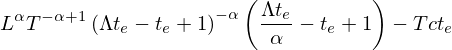

In [18]:
Y = T**(1-alpha)*L**alpha* (1-te+Lambda/alpha*te) /  (1-te+Lambda*te)**alpha-c*te*T
Y

It helps along the software if we rewrite this in intensive form, (dropping the multiplicative constant $T$):

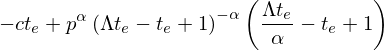

In [21]:
Y = p**alpha* (1-te+Lambda/alpha*te) /  (1-te+Lambda*te)**alpha - c*te
Y

The derivative of this expression is: 

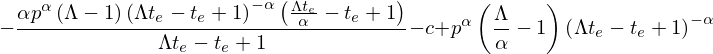

In [23]:
Yp = diff(Y, te)
Yp

The values at zero and one are:

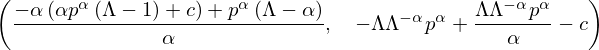

In [24]:
Yp0 = Yp.subs({te:0}).simplify()
Yp1 = Yp.subs({te:1}).simplify()
Yp0, Yp1

So, our "start enclosing" locus and our "finish enclosing" locus are (once again, if the circumstances of the first item on the list hold:

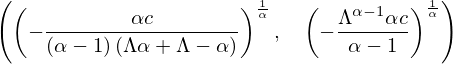

In [28]:
solve(Yp0, p)[0], solve(Yp1, p)[0]

Now, if the circumstances (2) on the list hold, then we just look at endpoints. We form:

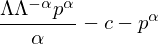

In [31]:
dY = Y.subs({te:1}) - Y.subs({te:0})
dY

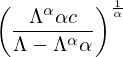

In [33]:
solve(dY, p)[0]

# First best, unconditional optimality

Now, we recall in our previous exposition that we didn't have these problems when labor was allocated optimally across uses, but let's add this in and get an "optimal" diagram. In this case, output was:

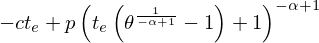

In [37]:
Yfb = p*((theta**(1/(1-alpha))-1 )*te + 1)**(1-alpha) - c*te
Yfb

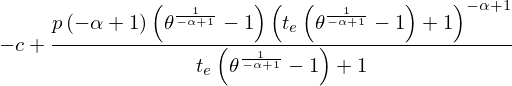

In [39]:
Yfbp = diff(Yfb, te)
Yfbp

Using the previous ideas - because $Y$ here is unambiguously concave, we have:

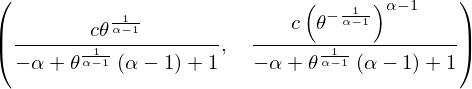

In [43]:
Yfbp0 = Yfbp.subs({te:0})
Yfbp1 = Yfbp.subs({te:1})
solve(Yfbp0, p)[0].simplify(), solve(Yfbp1, p)[0].simplify()

## Graph for inclusion in the paper

Let's make a graph of all of this...

In [44]:
import numpy as np
import matplotlib.pyplot as plt

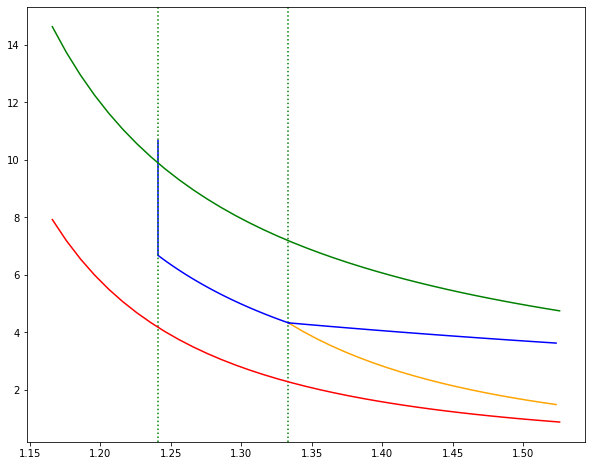

In [81]:
##### Base parameters  #####

c        = 1
alp      = 3/4

theta_crit1 = 1 / alp
theta_crit2 = 1 / alp**alp

##### Truncated ranges applicable only at certain points ####

thetar1 = np.arange(theta_crit1, 1.15*theta_crit1, .01)
thetar2 = np.arange(theta_crit2, theta_crit1+.001, .001) 

Lamr1 = (alp*thetar1)**(1/(1 - alp))
Lamr2 = (alp*thetar2)**(1/(1-  alp))

pr1s   = ( alp*c / ( (1-alp) * (Lamr1*alp + Lamr1 - alp) ) )**(1/alp)
pr1e   = ( alp*c / ( (1-alp) * Lamr1**(1-alp)))**(1/alp)

fig, ax = plt.subplots(figsize=(10, 8))

oline1 = ax.plot(thetar1, pr1s, color='orange')
bline1 = ax.plot(thetar1, pr1e, color='blue')

gline1  = ax.axvline(theta_crit1, color= 'green', linestyle=':')

##### Conditions when increasing...are as follows #####

pr2    = ( Lamr2**alp * alp* c / (Lamr2 - Lamr2**alp*alp) ) ** (1/alp)
bline2 = ax.plot(thetar2, pr2, color='blue')

gline2  = ax.axvline(theta_crit2, color='green', linestyle=':')
bline25 = ax.vlines(theta_crit2, np.max(pr2), np.max(pr2) + 4, color='blue', )

### Add in lines for unconditional optimality ###

theta_fb = theta_crit2 - .075

theta_fbr = np.arange(theta_fb, 1.15*theta_crit1, .01)
prfbs = (c*theta_fbr**(1/(alp-1)) / ((1-alp)*(1-theta_fbr**(1/(alp-1))) ) )**(1/alp)
prfbe = ( (c / theta_fbr) / ((1-alp)*(1-theta_fbr**(1/(alp-1))) ) )**(1/alp)



rline1 = ax.plot(theta_fbr, prfbs, color='red')
rline2 = ax.plot(theta_fbr, prfbe, color='green')

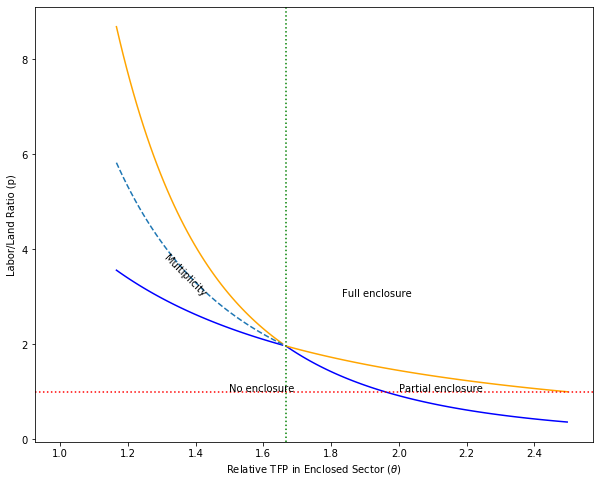

In [57]:
##### Base parameters  #####

c          = 1
alpha      = 3/5
theta_star = 1/alpha

##### Automated ranges #####

thetar1 = np.arange(theta_star, 1.5*theta_star, .01)
thetar2 = np.arange(theta_star*.7, theta_star, .01)

##### plot functions   #####

def p1(T, C, Alpha):
    return (C / ((1-Alpha) * T))**(1/Alpha)  /  (Alpha*T)**(1/(1-Alpha))
    
def p2(T, C, Alpha):
    return (C / ((1-Alpha) * T))**(1/Alpha)  

def gg(T, C, Alpha):
    return ( (C/T)*((Alpha*T)**(1/(1-Alpha)) - 1)/((Alpha*T)**(1/(1-Alpha)) - (Alpha*T)**(Alpha/(1-Alpha))) ) **(1/Alpha)

p1_1 = p1(thetar1, c, alpha)
p2_1 = p2(thetar1, c, alpha)

p1_2 = p1(thetar2, c, alpha)
p2_2 = p2(thetar2, c, alpha)

gg_2 = gg(thetar2, c, alpha)

fig, ax = plt.subplots(figsize=(10, 8))
bline1 = ax.plot(thetar1, p1_1, color='blue')
oline1 = ax.plot(thetar1, p2_1, color='orange')

bline2 = ax.plot(thetar2, p2_2, color='blue')
oline2 = ax.plot(thetar2, p1_2, color='orange')

### Lines marking costs and lines marking critical theta

rline = ax.axhline(c, color = 'red', linestyle=':')
gline = ax.axvline(theta_star, color= 'green', linestyle=':')

ggline = ax.plot(thetar2, gg_2, c, alpha, linestyle='--')

text1 = ax.text(theta_star*(1.1), c+2, 'Full enclosure')
text2 = ax.text(2, c, 'Partial enclosure')
text3 = ax.text(theta_star*.9, c, 'No enclosure')
text4 = ax.text(1.3, 3, 'Multiplicity', rotation=-45)

xlab = ax.set_xlabel(r'Relative TFP in Enclosed Sector ($\theta$)')
ylab = ax.set_ylabel('Labor/Land Ratio (p)')

I am a little freaked out by my analysis above...it doesn't seem quite right. So, what if we redo this using more standard methods? Recall our $Y$ function is:

In [83]:
alpha, Lambda, theta, te, c, T, L, p = symbols('alpha Lambda theta t_e c T L p')

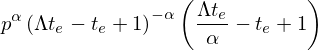

In [90]:
Y = p**alpha* (1-te+Lambda/alpha*te) /  (1-te+Lambda*te)**alpha #- c*te
Y

Even simpler...

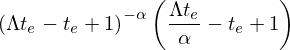

In [94]:
kt = (1-te+Lambda/alpha*te) /  (1-te+Lambda*te)**alpha
kt

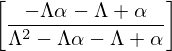

In [97]:
solve(diff(kt, te), te)

Let's just do a gut assessment. So, look at $Y$ again (land-intensive form):

$$
Y = p^\alpha \frac{1-t_e+\frac{\Lambda}{\alpha}t_e}{(1-t_e+\Lambda t_e)^\alpha} - ct_e
$$


We have already decided that the keys to this function is determining when $\Lambda>\alpha$ and $\Lambda>1$. In terms of our base parameters, these are $\theta > \frac{1}{\alpha^\alpha}$ and $\theta > \frac{1}{\alpha}$. 

If it is the case that if $\theta > \frac{1}{\alpha}$, then it must be the case that $\theta > \frac{1}{\alpha^\alpha}$. For example, if $\alpha=.5$, then $\frac{1}{\alpha}=2$, and $\frac{1}{\alpha^\alpha}=\sqrt{2}$. 

### Part one

Now, if it is the case that $\frac{\Lambda}{\alpha} > 1$ ($\theta > \frac{1}{\alpha^\alpha}$), and that $\Lambda > 1$ ($\theta > \frac{1}{\alpha})$, the numerator increases in linear fashion, while the denominator increases but at a slower rate. Therefore, $Y$ is increasing at a decreasing rate - $Y$ is generically concave as a function of. Therefore, we can check the conditions using derivatives. If the derivative is positive at $t_e=0$, then some enclosure should occur. If it is still positive at $t_e=1$, then full enclosure should occur.  

### Part two

Now, suppose that $\frac{\Lambda}{\alpha} > 1$ ($\theta > \frac{1}{\alpha^\alpha}$) but that $\Lambda < 1$. ($\theta < \frac{1}{\alpha})$. Now, we see that the numerator of $Y$ is increasing in $t_e$, and the denominator is decreasing in $t_e$. This means that $Y$ is convex in $t_e$. In these circumstances, we will have either complete enclosure or none at all...and we have to check the endpoints. 

### Part three

What if both our inequalities are violated? I don't think this really matters...in these circumstances, both the numerator and the denominator are decreasing, but is the whole function increasing or not? It looks like in these cases there is always a point at which things go down and then up...


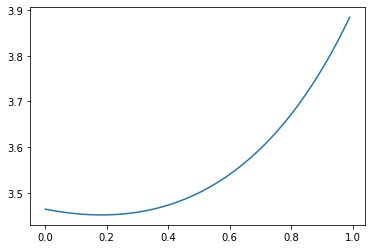

In [109]:
def Y(t, T=1, p=12, c=1, a=1/2):
    
    lam = a*T**(1/(1-a))
    return p**a*(1 +lam/a*t-t ) / (1 + lam*t - t)**a - c*t
    print(lam, lam/a)

tt = np.arange(0, 1, .01)

Yt = Y(tt, 1)
pud = plt.plot(tt, Yt)